<a href="https://colab.research.google.com/github/jmartinbellido/Repsol_Python/blob/main/Repsol_Python_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÍNDICE
# **ISDI Repsol D4D/D4B**
# Introducción a Python para Análisis de Datos
## *Notebook 3: Data Cleaning & Exploratory Data Analysis (EDA)*

### ÍNDICE
1. DATA CLEANING
2. EDA: FRECUENCIA
3. EDA: CORRELACIÓN
4. EDA: DISTRIBUCIÓN
5. EDA: SERIES TEMPORALES
6. EJERCICIOS

### Profesor: Juan Martin Bellido (jmbelldo@isdi.education)

---


In [4]:
# antes de empezar, cargamos librerías (instalamos en caso de ser necesario)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure
from scipy import stats
import scipy

In [ ]:
# la siguiente línea de código permite editar el tamaño de los gráficos propios de la librería seaborn (sn)
sn.set(rc={'figure.figsize':(12,8)}) # cambiamos tamaño

# DATA CLEANING
En este apartado, revisaremos tres ejercicios básicos de limpieza de datos: 

*   Operar con valores nulos
*   Remover valores duplicados
*   Identificar outliers



In [ ]:
# Importamos DataFrame
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

### Operar con valores nulos
---

#### Identificar valores nulos en un DataFrame

El primer paso es corroborar si existen valores nulos en nuestros DataFrame y, en tal caso, identificar en qué campos.

En esta sección utilizaremos dos funciones/métodos:

```
isna(object)
```
> *El método isna() testea si los valores son NaN (True) o no (False)*

```
any(boolean object)
```
> *El método any() permite comprobar si al menos un elemento es True*








In [ ]:
# Paso 1: aplicamos isna() al DataFrame para testear si cada elemento es nulo o no
nan_values = df_jamesbond.isna() # almacenamos el resultado en un nuevo objeto
nan_values # visualizamos el objeto creado

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Dr. No,False,False,False,False,False,False
From Russia with Love,False,False,False,False,False,False
Goldfinger,False,False,False,False,False,False
Thunderball,False,False,False,False,False,False
Casino Royale,False,False,False,False,False,True
You Only Live Twice,False,False,False,False,False,False
On Her Majesty's Secret Service,False,False,False,False,False,False
Diamonds Are Forever,False,False,False,False,False,False
Live and Let Die,False,False,False,False,False,True


In [ ]:
# Paso 2: testeamos si al menos un elemento de cada campo es True (nulo)
nan_columns = nan_values.any() # aplicamos any() al objeto nan_values y lo almacenamos en un nuevo objeto
nan_columns # ahora visualicemos el objeto que hemos creado
# nota: al visualizar el objeto, encontramos valores nulos para la variable "Bond Actor Salary"

Year                 False
Actor                False
Director             False
Box Office           False
Budget               False
Bond Actor Salary     True
dtype: bool

#### Modificar valores nulos en un DataFrame
Una vez hemos identificado valores nulos, podemos decidir entre:
*   remover filas con al menos un valor nulo, o
*   reemplazar valores nulos

Funciones que introduciremos en esta sección:

```
fillna(value)
```
> *Este método reemplaza elementos nulos asignando el valor que establezcamos como parámetro*





In [ ]:
# Hemos identificado valores nulos en campo "Bond Actor Salary", ahora procederemos a omitir filas con valores nulos en esta variable
cond = df_jamesbond["Bond Actor Salary"].isna()
df_jamesbond[-cond] # negamos la confición para omitir filas con valores nulos para variable "Bond Actor Salary"

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4
On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6
Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8
Octopussy,1983,Roger Moore,John Glen,373.8,53.9,7.8
A View to a Kill,1985,Roger Moore,John Glen,275.2,54.5,9.1


In [ ]:
# De forma alternativa podríamos optar por reeplazar valores nulos por el valor de la media para esta variable 
median_bond_salary = df_jamesbond["Bond Actor Salary"].mean() # calculamos la media
df_jamesbond["Bond Actor Salary"]=df_jamesbond["Bond Actor Salary"].fillna(median_bond_salary) # reemplazamos valores nulos

# Nota: en otros casos simplemente buscaremos reemplazar valores nulos por 0 --> .fillna(0)

### Remover valores duplicados
---

In [ ]:
# Importamos un DataFrame que contiene valores duplicados
df_duplicates = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/renfe_estaciones_duplicates.csv")

#### Identificar valores duplicados

Funciones nuevas que introduciremos en esta sección:
```
object.duplicated()
```
> *Este método permite testear si una fila es duplicado perfecto de otra existente*



In [ ]:
len(df_duplicates) # comprobamos número de filas en DataFrame

630

In [ ]:
# Identificamos valores duplicados
cond = df_duplicates.duplicated()
df_duplicates[cond]

,CODIGO,DESCRIPCION,LATITUD,LONGITUD,DIRECCION,C.P.,POBLACION,PROVINCIA,PAIS
16,5000,GRANADA,37.184036,-3.609036,AVENIDA DE LOS ANDALUCES. S/N,18014.0,Granada,Granada,España
24,10204,ZARZALEJO,40.538817,-4.158073,CALLE DEL FERROCARRIL. S/N,28293.0,Zarzalejo,Madrid,España
57,11208,VITORIA/GASTEIZ,42.841528,-2.672665,PLAZUELA DE LA ESTACION. 1,1005.0,Vitoria-Gasteiz,Araba/Álava,España
74,11203,MANZANOS,42.742875,-2.867530,RIO ZADORRA KALEA. S/N,1220.0,Ribera Baja/Erribera Beitia,Araba/Álava,España
90,15006,CISNEROS,42.191068,-4.850206,CARRETERA P-932 - ESTACION FERROCARRIL. S/N,34320.0,Cisneros,Palencia,España
181,23004,PONTEVEDRA,42.421640,-8.635830,AVENIDA DE LA ESTACION. S/N,36003.0,Pontevedra,Pontevedra,España
222,31205,A GUDIÑA,42.060690,-7.132436,CARRETERA N-525 - BEATO SEBASTIAN APARICIO. S/N,32540.0,Gudiña. A,Ourense,España
227,34005,SAN PEDRO DEL ARROYO,40.803838,-4.871408,CALLE ESTACION FERROCARRIL. S/N,5350.0,San Pedro del Arroyo,Ávila,España
242,35206,NAVALMORAL DE LA MATA,39.894854,-5.545566,PLAZA ESTACION FERROCARRIL. 1,10300.0,Navalmoral de la Mata,Cáceres,España
253,37300,PUERTOLLANO,38.691411,-4.111611,CALLE MUELLE. S/N,13500.0,Puertollano,Ciudad Real,España


#### Remover valores duplicados

Funciones nuevas que introducidemos en esta sección:
```
object.drop_duplicates()
```
> *Este método elimina automáticamente filas duplicadas*

In [ ]:
df_clean = df_duplicates.drop_duplicates() # removemos filas duplicadas y almacenamos el output en un nuevo objeto

In [ ]:
len(df_clean) # corroboranos que el nuevo DataFrame contiene menos filas

620

### Identificar outliers
---


In [ ]:
# Importamos DataFrame
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

Es importante identificar outliers en variables continuas. Dependiendo del caso, estaremos interesados únicamente en detectar posibles errores o en eliminar todo posible outliers (sea un error o no).

Existen distintas formas de detectar outliers. En este curso, introduciremos un método sencillo: *normalizando la variable a z (distribución normal)*. En este método, asumiremos que la variable se distribuye normalmente y la convertiremos a z. Por convención, entendemos valores outliers a aquellos con valor absoluto mayor a 3 (z>3 y z<-3).

Funciones nuevas que introducimos en esta sección:

```
stats.zscore(column, nan_policy='omit')
```
> *Este método normaliza una variable a z (distribución normal)*





In [ ]:
# Normalizamos la variable "Box Office" a z
df_jamesbond["z_Box Office"] = stats.zscore(df_jamesbond["Box Office"],nan_policy='omit').round(2)

In [ ]:
# Seleccionamos "Box Office" y su versión normalizada
df_jamesbond[["Box Office","z_Box Office"]].sort_values("z_Box Office",ascending=False)
# Nota: no detectamos outliers

,Box Office,z_Box Office
Film,,
Skyfall,943.5,2.61
Thunderball,848.1,2.06
Goldfinger,820.4,1.90
Spectre,726.7,1.36
Casino Royale,581.5,0.52
From Russia with Love,543.8,0.30
Moonraker,535.0,0.25
The Spy Who Loved Me,533.0,0.24
GoldenEye,518.5,0.16


# EDA: FRECUENCIA
Al explorar frecuencia, buscamos entender la cantidad de veces que se repite cada valor en una variable categórica.

Funciones nuevas que introducimos en esta sección:

```
describe()
```
> *Al aplicar describe() a una variable categórica podemos obtener información básica sobre la cantidad de observaciones, valores únicos y frecuencia mayor*

```
value_counts(normalize=False)
```
> *Este método permite obtener la frecuencia para cada valor único en una variable categórica. Por defecto, devuelve la frecuencia en valor absoluto; al editar el parámetro "normalize" permite obtener la frecuencia relativa*

```
plot(kind='bar'/'barh')
```
> *Este método permite realizar gráficos simples de distinto tipo. En esta sección editaremos el parámetro "kind" para construir gráficos de barra*





In [5]:
# Importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [11]:
# Generamos información básica sobre una variable categórica
df_jamesbond["Director"].describe()

count            26
unique           13
top       John Glen
freq              5
Name: Director, dtype: object

In [10]:
# Obtenemos la frecuencia en valor absoluto
df_jamesbond["Director"].value_counts()

John Glen             5
Guy Hamilton          4
Lewis Gilbert         3
Terence Young         3
Sam Mendes            2
Martin Campbell       2
Ken Hughes            1
Peter R. Hunt         1
Marc Forster          1
Irvin Kershner        1
Michael Apted         1
Lee Tamahori          1
Roger Spottiswoode    1
Name: Director, dtype: int64

In [12]:
# El parámetro normalize nos permite crear una tabla con la frecuencia relativa
df_jamesbond["Director"].value_counts(normalize=True)

John Glen             0.192308
Guy Hamilton          0.153846
Lewis Gilbert         0.115385
Terence Young         0.115385
Sam Mendes            0.076923
Martin Campbell       0.076923
Ken Hughes            0.038462
Peter R. Hunt         0.038462
Marc Forster          0.038462
Irvin Kershner        0.038462
Michael Apted         0.038462
Lee Tamahori          0.038462
Roger Spottiswoode    0.038462
Name: Director, dtype: float64

In [ ]:
# Podemos obtener la frecuancia para combinaciones de más de una variable categórica
df_jamesbond[["Director","Actor"]].value_counts()

Director            Actor         
Terence Young       Sean Connery      3
John Glen           Roger Moore       3
Sam Mendes          Daniel Craig      2
Guy Hamilton        Sean Connery      2
John Glen           Timothy Dalton    2
Lewis Gilbert       Roger Moore       2
Guy Hamilton        Roger Moore       2
Marc Forster        Daniel Craig      1
Martin Campbell     Daniel Craig      1
                    Pierce Brosnan    1
Lee Tamahori        Pierce Brosnan    1
Ken Hughes          David Niven       1
Michael Apted       Pierce Brosnan    1
Peter R. Hunt       George Lazenby    1
Irvin Kershner      Sean Connery      1
Roger Spottiswoode  Pierce Brosnan    1
Lewis Gilbert       Sean Connery      1
dtype: int64

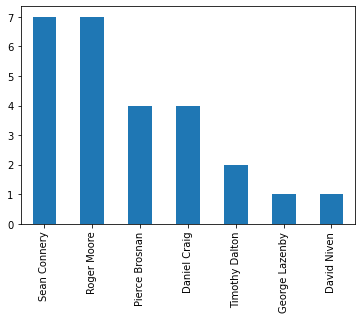

In [ ]:
# A continuación, utilizaremos un gráfico de barra (vertical) para visualizar la frecuencia
df_jamesbond["Actor"].value_counts().plot(kind = 'bar')

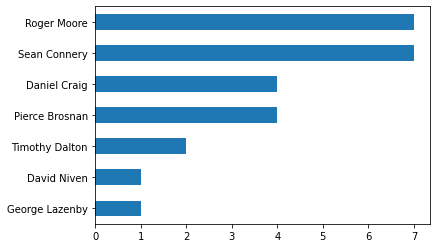

In [ ]:
# De forma alternativa, podemos optar por un gráfico horizontal
df_jamesbond["Actor"].value_counts().sort_values().plot(kind = 'barh')

# EDA: CORRELACIÓN
Al explorar correlación, buscamos medir el grado de asociación y dirección entre dos variable continuas.

*Funciones nuevas que introducimos en esta sección:*

```
scipy.stats.pearsonr(x,y)
```
> *Esta función permite obtener la correlación (Pearson) entre dos variables continuas; también proporciona el p-value para la prueba de hipótesis de que no existe correlación entre las variables (H0: r=0%)*

```
corr()
```
> *Este método permite construir una matrix de correlación*

```
plot(x,y,kind="scatter")
```
> *En esta sección, utilizaremos el método plot para visualizar gráficos de dispersión*

```
sn.heatmap(object, annot=True)
```
> *Este método permite visualizar gráficos de tipo "heatmap"*; el parámetro "annot" permite añadir anotaciones al gráfico


In [ ]:
# Importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [ ]:
# Obtenemos la correlación entre dos variables continuas en nuestro DataFrame
## el tipo de correlación utilizada es pearson's
scipy.stats.pearsonr(df_jamesbond["Box Office"],df_jamesbond["Budget"])
# Nota: el grado de correlación entre las variables seleccionadas es positivo y bajo (28%)

(0.28318466575203255, 0.1609638785608065)

In [ ]:
# A continuación, construiremos una matrix de correlación para evaluar la correlación entre todas las variables continuas
df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].corr()
## las variables con mayor grado de correlación son "Budget" y "Bond Actor Salary"

,Box Office,Budget,Bond Actor Salary
Box Office,1.000000,0.283185,0.069542
Budget,0.283185,1.000000,0.728390
Bond Actor Salary,0.069542,0.728390,1.000000


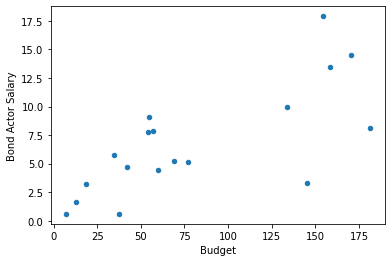

In [ ]:
# Utilizamos el método plot(), especificando dos variables numéricas para realizar un gráfico de dispersión
df_jamesbond.plot("Budget","Bond Actor Salary",kind="scatter")

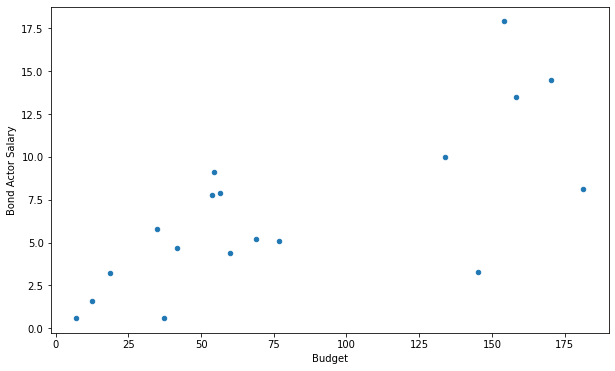

In [ ]:
# En el método plot(), podemos cambiar el tamaño del gráfico editando el parámetro "figsize"
df_jamesbond.plot("Budget","Bond Actor Salary",kind="scatter",figsize=(10,6))

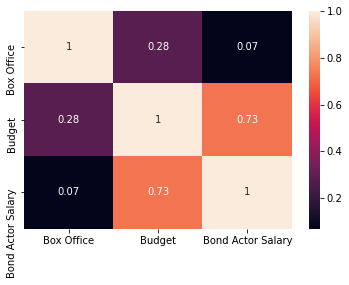

In [ ]:
# Para visualizar una matriz de correlación, podemos utilizar un gráfico de tipo "heatmap"
corrMatrix= df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].corr()
sn.heatmap(corrMatrix, annot=True) # utilizamos la librearía seaborn para realizar un heatmap

# EDA: DISTRIBUCIÓN
El estudiar distribución, buscamos entender cómo se encuentra dispersa una variable continua en el total de observaciones. 

*Funciones nuevas que introducimos en esta sección:*

```
describe(object,percentiles=[...])
```
> Este método permite obtener la distribución de todas las variables numéricas incluidas en un DataFrame. Por defecto, despliega la distribución en cuartiles, podemos editar esto utilizando el parámetro "percentiles"

```
hist(bins=x)
```
> El método hist() grafica histogramas. Podemos editar los rangos numéricos del eje x utilizando el parámetro "bins"

```
sn.boxplot(x, y, data=object)
```
> Esta función permite graficar boxplots



In [ ]:
# Importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [ ]:
# Seleccionamos variables continuas y analizamos su distribución
df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].describe()

,Box Office,Budget,Bond Actor Salary
count,26.000000,26.000000,18.000000
mean,491.611538,80.719231,6.850000
std,176.740396,57.097608,4.805175
min,250.900000,7.000000,0.600000
25%,375.350000,38.450000,3.575000
50%,461.750000,60.050000,5.500000
75%,534.500000,123.300000,8.850000
max,943.500000,206.300000,17.900000


In [ ]:
# A continuación, editamos la distribución para poder verla en deciles
df_jamesbond[['Box Office','Budget','Bond Actor Salary']].describe(
    percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # especificamos cómo queremos la distribución
    ).T # pivotamos la tabla para pasar de una tabla larga a una ancha

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Box Office,26.0,491.611538,176.740396,250.9,302.50,334.00,409.75,448.80,461.75,514.20,525.75,543.80,773.55,943.5
Budget,26.0,80.719231,57.097608,7.0,23.15,34.70,43.50,54.50,60.05,76.90,88.75,145.30,164.25,206.3
Bond Actor Salary,18.0,6.850000,4.805175,0.6,1.30,3.24,4.43,5.02,5.50,7.82,8.08,9.64,13.80,17.9


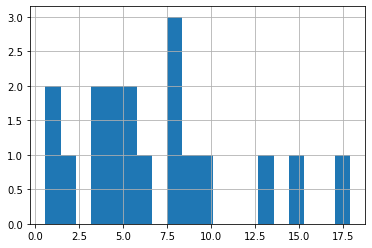

In [ ]:
# Seleccionamos una variable continua y utilzamos método .hist() para graficar un histograma
df_jamesbond["Bond Actor Salary"].hist(bins=20) # adaptamos el número de "bins"

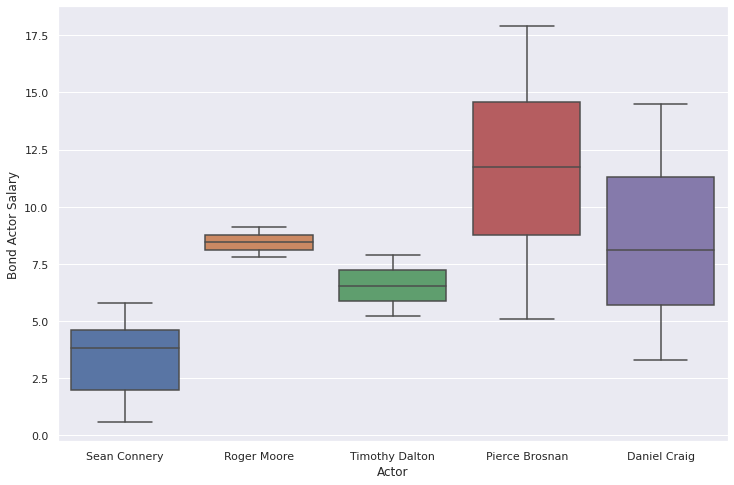

In [ ]:
# A continuación, graficamos un boxplot para visualizar la distribución por grupos de una variable categórica
# Creamos una condición para seleccionar ciertos actores
cond = df_jamesbond["Actor"].isin(['Sean Connery','Daniel Craig','Roger Moore','Pierce Brosnan','Timothy Dalton'])
# Graficamos un boxplot
sn.boxplot(x="Actor", y="Bond Actor Salary", data=df_jamesbond[cond])

# EDA: SERIES TEMPORALES
En una serie temporal, buscamos analizar la evolución de una variable numérica a lo largo del tiempo.

*Funciones nuevas que introducimos en esta sección:*

```
plot()
```
> Por defecto, el método plot grafica series temporales. Para ello, necesitamos que el DataFrame se encuentre indexado por la variable de tiempo




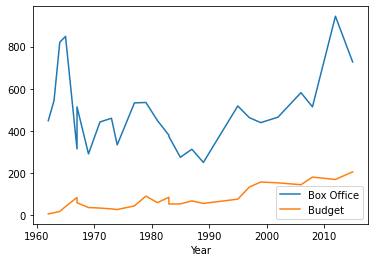

In [ ]:
# A continuación, graficamos dos variables numéricas a lo largo del tiempo
df_jamesbond.set_index("Year")[["Box Office","Budget"]].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6450f4ccd0>,
      dtype=object)

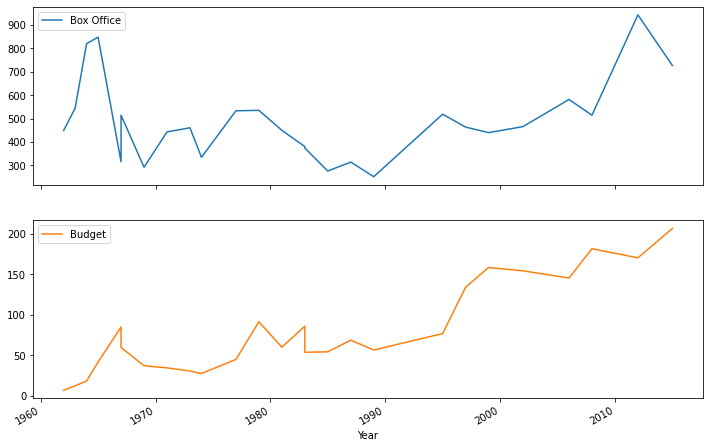

In [ ]:
# A continuación, repetiremos el ejercicio editando (i) el tamaño del gráfico y (ii) creando un gráfico independiente para cada variable
df_jamesbond.set_index("Year")\
    [["Box Office","Budget"]]\
    .plot(figsize=(12,8),subplots=True) # subplots nos permite dividir cada variable en un gráfico distinto

# EJERCICIOS

##### EX 1
> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv

Graficar un histograma para visualizar la distribución de la variable IMDB score

---


In [ ]:
# antes de empezar, cargamos librerías (instalamos en caso de ser necesario)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure

In [ ]:
# importamos df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

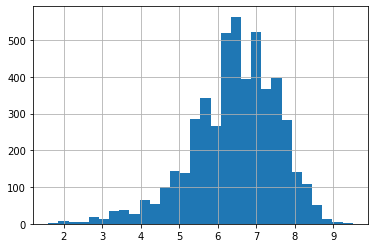

In [ ]:
# EX 1
df_movies["imdb_score"].hist(bins=30)

##### EX 2
> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv

¿Qué podemos decir acerca de la distribución del PIB per cápita en cada continente? Graficar un boxplot

---


In [ ]:
# antes de empezar, cargamos librerías (instalamos en caso de ser necesario)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure

In [ ]:
# importamos df
df_who = pd.read_csv('https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv')
df_who.dtypes

Country                                                    object
CountryID                                                   int64
ContinentID                                                 int64
Adolescent fertility rate (%)                             float64
Adult literacy rate (%)                                   float64
Gross national income per capita (PPP international $)    float64
Net primary school enrolment ratio female (%)             float64
Net primary school enrolment ratio male (%)               float64
Population (in thousands) total                           float64
Population annual growth rate (%)                         float64
Population in urban areas (%)                             float64
Population living below the poverty line                  float64
Continent                                                  object
dtype: object

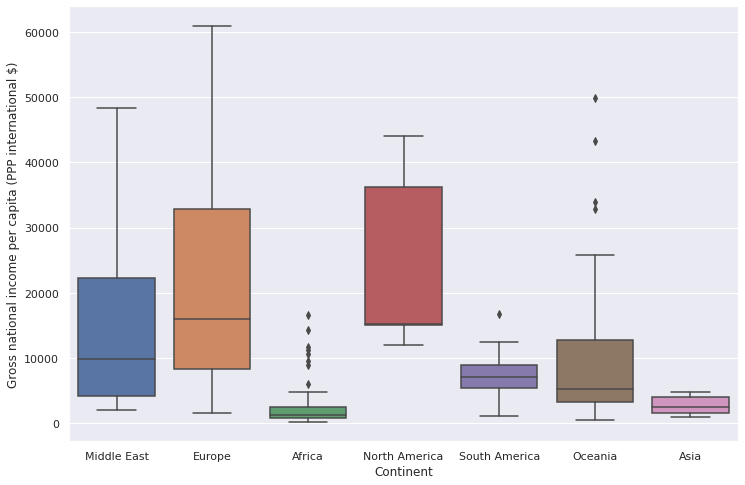

In [ ]:
sn.set(rc={'figure.figsize':(12,8)}) # cambiamos tamaño
# Graficamos un boxplot
sn.boxplot(x="Continent", y="Gross national income per capita (PPP international $)", data=df_who)

##### EX 3
> Dataset https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv

¿Cómo ha evolucionado la cotización "High" de las acciones desde el 2017?

---

In [ ]:
# antes de empezar, cargamos librerías (instalamos en caso de ser necesario)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure

In [ ]:
# importamos df
df_amzn = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv")
df_amzn.dtypes

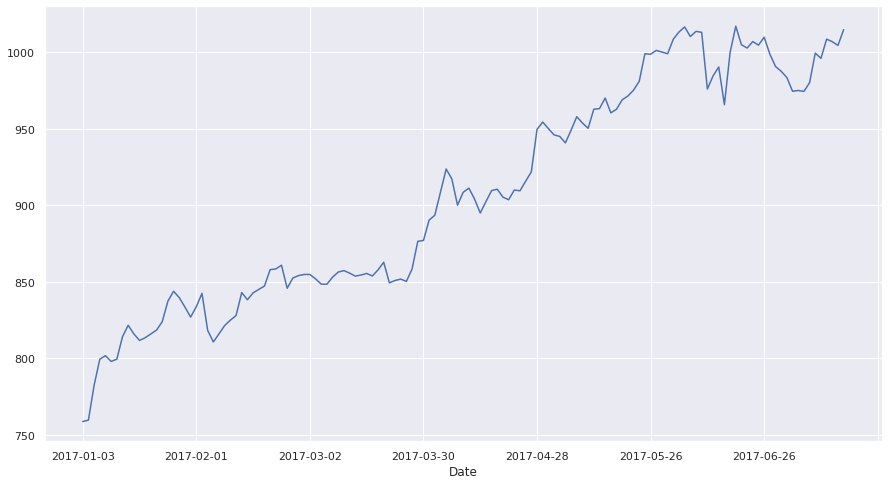

In [ ]:
# EX 3
df_amzn[df_amzn["Date"]>'2017-01-01'].set_index("Date")["High"].plot(figsize=(15,8))

##### EX 4 
Dataset > https://data-wizards.s3.amazonaws.com/datasets/movies.csv

##### EX 4.A: ¿Cuántos directores hay incluidos en el dataset?
##### EX 4.B: Extraer top 10 variables, según correlación con variable *IMDB score*
##### EX 4.C: Extraer películas que sean outliers (z>3) en términos de duración. Visualizar únicamente "movie_title" y "duration"
##### EX 4.D: Extraer películas en el decil superior en términos de "imdb_score", visualizar únicamente "movie_title", "director_name" y "imdb_score"
---

In [ ]:
# antes de empezar, cargamos librerías (instalamos en caso de ser necesario)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure

In [ ]:
# importamos df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
# EX 4.A
df_movies["director_name"].describe()

count                 4814
unique                2397
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

In [ ]:
# EX 4.B
df_movies.corr().sort_values("imdb_score",ascending=False).iloc[1:11,]["imdb_score"]

num_voted_users              0.412427
num_critic_for_reviews       0.309733
num_user_for_reviews         0.295779
duration                     0.264440
movie_facebook_likes         0.252496
gross                        0.199914
director_facebook_likes      0.173969
cast_total_facebook_likes    0.086830
actor_2_facebook_likes       0.083761
actor_1_facebook_likes       0.077070
Name: imdb_score, dtype: float64

In [ ]:
# EX 4.C
df_movies["z_duration"] = stats.zscore(df_movies["duration"],nan_policy='omit').round(2)
cond = df_movies["z_duration"] > 3
df_movies[cond].sort_values("duration",ascending=False)["duration"]

movie_title
Trapped                                          511.0
Carlos                                           334.0
Blood In, Blood Out                              330.0
Heaven's Gate                                    325.0
The Legend of Suriyothai                         300.0
Das Boot                                         293.0
Apocalypse Now                                   289.0
The Company                                      286.0
Gods and Generals                                280.0
Gettysburg                                       271.0
Arn: The Knight Templar                          270.0
Cleopatra                                        251.0
Once Upon a Time in America                      251.0
The Wolf of Wall Street                          240.0
Emma                                             240.0
Gandhi                                           240.0
Dances with Wolves                               236.0
Lawrence of Arabia                               227.

In [ ]:
# EX 4.D
cond = df_movies["imdb_score"]>= df_movies["imdb_score"].quantile(.9)
df_movies[cond].sort_values("imdb_score",ascending=False)[["director_name","imdb_score"]]

,director_name,imdb_score
movie_title,,
Towering Inferno,John Blanchard,9.5
The Shawshank Redemption,Frank Darabont,9.3
The Godfather,Francis Ford Coppola,9.2
Kickboxer: Vengeance,John Stockwell,9.1
Dekalog,NaN,9.1
...,...,...
Birdman or (The Unexpected Virtue of Ignorance),Alejandro G. Iñárritu,7.8
Hamlet,Kenneth Branagh,7.8
The White Ribbon,Michael Haneke,7.8
